In [104]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

# 선형회귀

# 단순선형회귀 모델 만들기

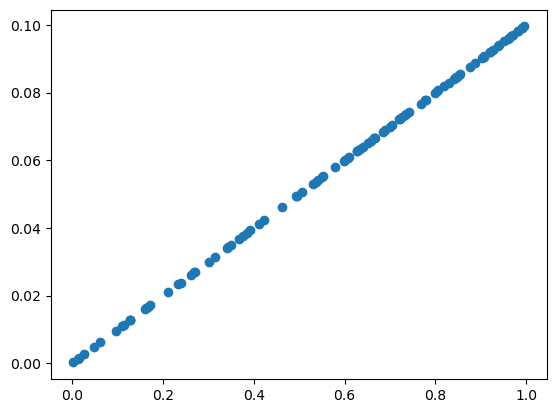

In [105]:
X = np.random.rand(100)
y = 0.2 * X * 0.5 # ax + b

plt.scatter(X, y)

In [106]:
def plt_prediction(pred, y):
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='orange', label='Actual')
    plt.scatter(X, pred, color='green', label='Prediction')
    plt.legend()
    plt.show()

# 경사하강법 y = mX + b, w 결정

In [107]:
W = np.random.uniform(-1, 1)   
b = np.random.uniform(-1, 1)
learning_rate = 0.5 # 임의의 값

Epoch: 0, W: -0.3591, Error: 0.1176


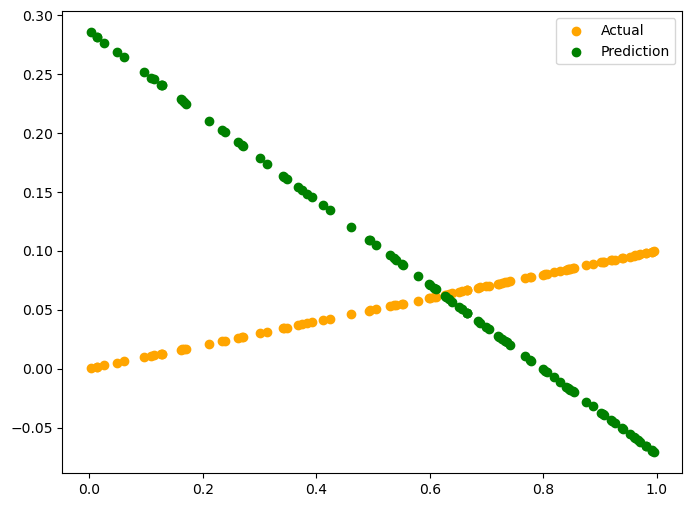

Epoch: 10, W: -0.2315, Error: 0.0854


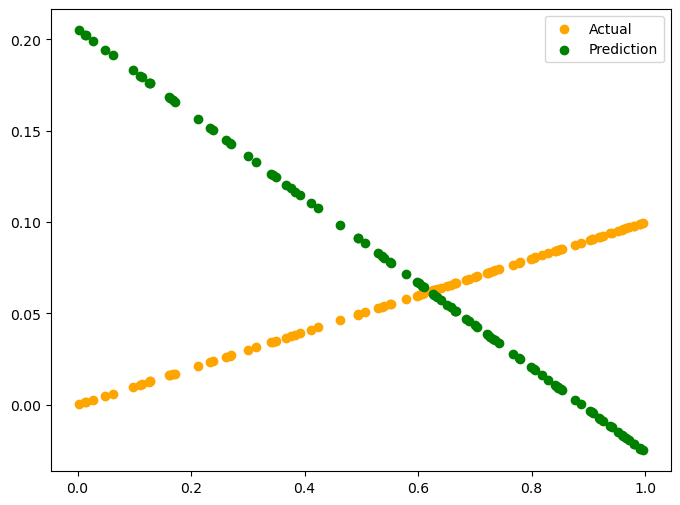

Epoch: 20, W: -0.1389, Error: 0.0616


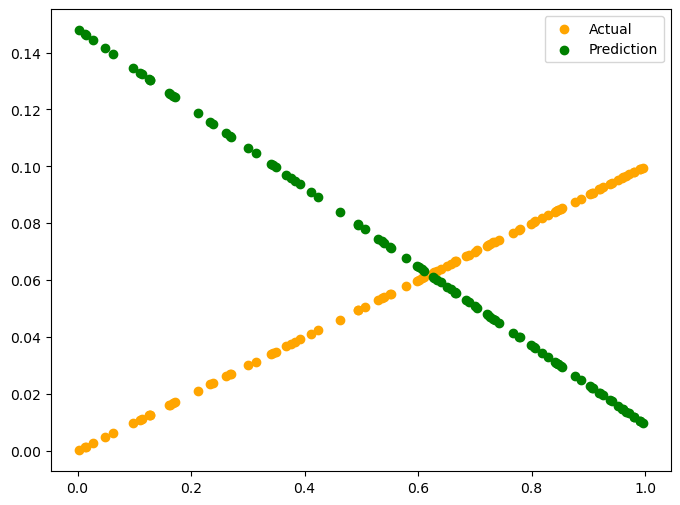

Epoch: 30, W: -0.0722, Error: 0.0444


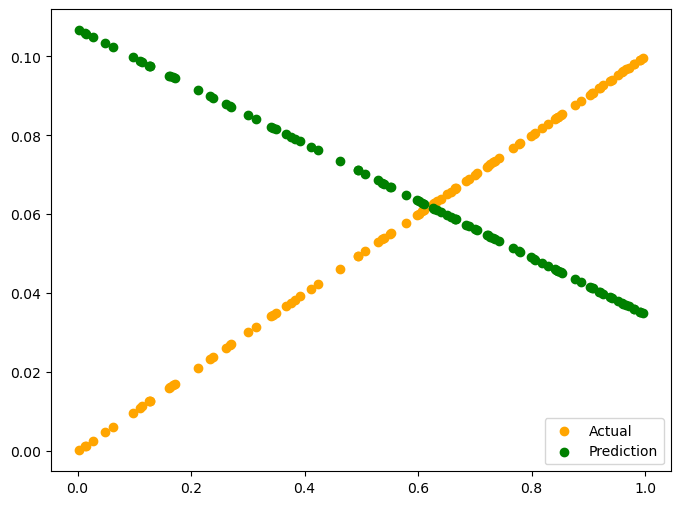

Epoch: 40, W: -0.0241, Error: 0.0320


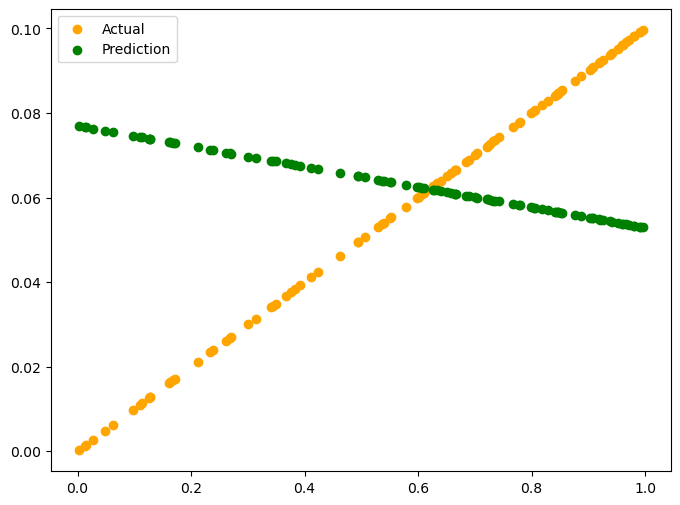

Epoch: 50, W: 0.0106, Error: 0.0230


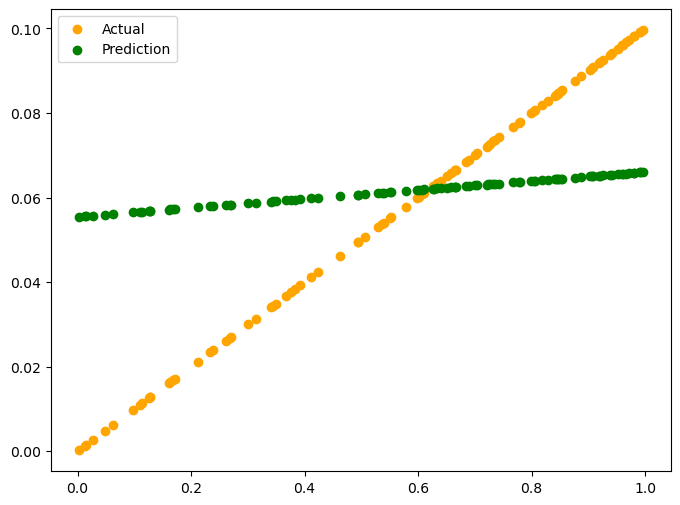

Epoch: 60, W: 0.0356, Error: 0.0166


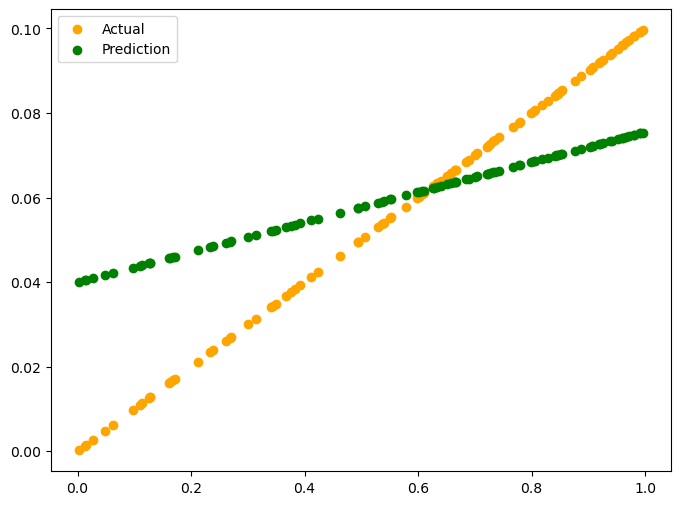

Epoch: 70, W: 0.0536, Error: 0.0120


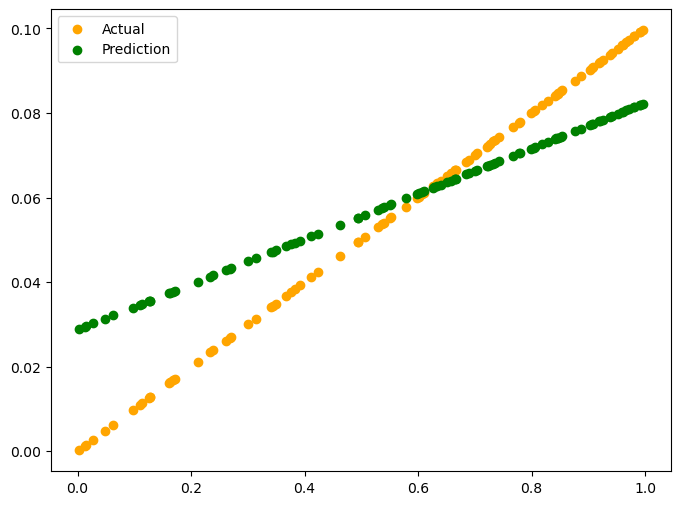

Epoch: 80, W: 0.0665, Error: 0.0086


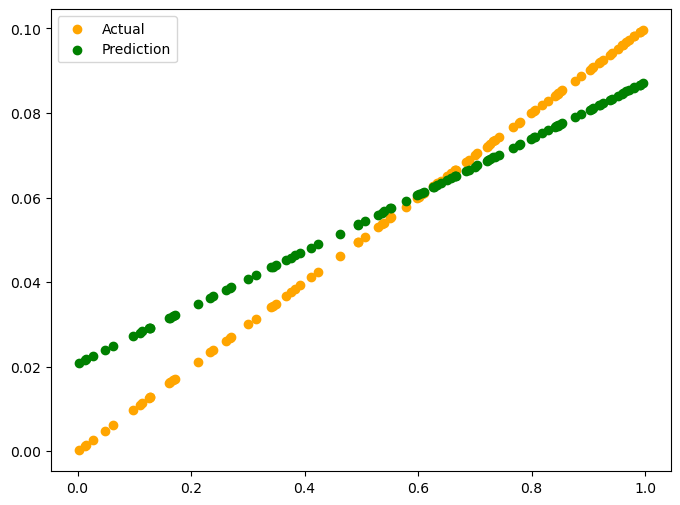

Epoch: 90, W: 0.0759, Error: 0.0062


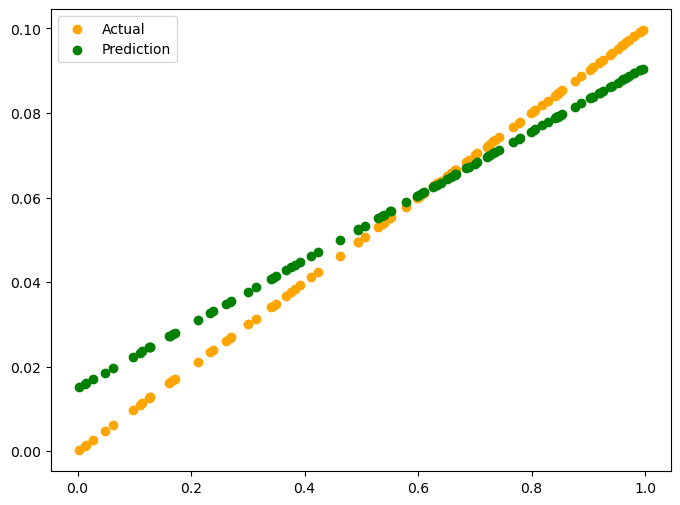

In [108]:
for epoch in range(100):
    y_pred = W * X + b
    error = np.abs(y_pred - y).mean()
    
    if error < 0.001:
        break
    
    W_descent = learning_rate * ((y_pred - y) * X).mean()
    b_descent = learning_rate * (y_pred - y).mean()
    
    W = W - W_descent
    b = b - b_descent
    
    if epoch % 10 == 0:
        print(f'Epoch: {epoch}, W: {W:.4f}, Error: {error:.4f}')
        y_pred = W * X + b
        plt_prediction(y_pred, y)

In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

boston_df = pd.read_csv('boston.csv')
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

In [110]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [111]:
X = boston_df.drop('target', axis=1).values
y = boston_df['target'].values

boston_df.shape

(506, 14)

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred[:3]

array([28.64896005, 36.49501384, 15.4111932 ])

In [113]:
# 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(4.638689926172791)

In [114]:
# 결정계수
r2_score(y_test, y_pred)

np.float64(0.7112260057484968)

In [115]:
# 회귀식
# W1, W0
lr.intercept_, lr.coef_

(np.float64(31.631084035694435),
 array([-1.33470103e-01,  3.58089136e-02,  4.95226452e-02,  3.11983512e+00,
        -1.54170609e+01,  4.05719923e+00, -1.08208352e-02, -1.38599824e+00,
         2.42727340e-01, -8.70223437e-03, -9.10685208e-01,  1.17941159e-02,
        -5.47113313e-01]))

y = W0 + W1*X1 + W2*X2 + ... + W13*X13

In [116]:
np.round(lr.intercept_, 1), np.round(lr.coef_, 1)

(np.float64(31.6),
 array([ -0.1,   0. ,   0. ,   3.1, -15.4,   4.1,  -0. ,  -1.4,   0.2,
         -0. ,  -0.9,   0. ,  -0.5]))

In [117]:
pd.Series(data = np.round(lr.coef_, 1), index=boston_df.drop('target', axis=1).columns).sort_values(ascending=False)

RM          4.1
CHAS        3.1
RAD         0.2
INDUS       0.0
ZN          0.0
B           0.0
TAX        -0.0
AGE        -0.0
CRIM       -0.1
LSTAT      -0.5
PTRATIO    -0.9
DIS        -1.4
NOX       -15.4
dtype: float64

In [118]:
from sklearn.model_selection import cross_val_score
neg_mse_scores = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=5)
neg_mse_scores

array([-12.46030057, -26.04862111, -33.07413798, -80.76237112,
       -33.31360656])

In [119]:
# MSE, RMSE
rmse = np.sqrt(neg_mse_scores * -1)
np.mean(rmse), rmse

(np.float64(5.828658946215813),
 array([3.52991509, 5.10378498, 5.75101191, 8.9867887 , 5.77179405]))

In [120]:
# R2
r2_scores = cross_val_score(lr, X, y, scoring='r2', cv=5)
r2_scores, np.mean(r2_scores)

(array([ 0.63919994,  0.71386698,  0.58702344,  0.07923081, -0.25294154]),
 np.float64(0.3532759243958839))

오차는 커지고 결정계수는 작아졌다.

# 다항회귀 모델

y = w0 + w1x1 + w2x2 + w3x1^2 + w4x2^2

In [121]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model_poly = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('linear', LinearRegression())
])

model_poly.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('linear', LinearRegression())])

In [123]:
pred_poly = model_poly.predict(X_test)
mean_squared_error(y_test, pred_poly)

np.float64(25.257540310853255)

In [124]:
r2_score(y_test, pred_poly)

np.float64(0.661032196845875)

2차 ~ 5차 다항회귀 시뮬레이션

In [125]:
results = []

for degree in range(1, 6):
    model_poly = Pipeline([
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('linear', LinearRegression())
    ])
    model_poly.fit(X_train, y_train)
    pred_poly = model_poly.predict(X_test)
    mse = mean_squared_error(y_test, pred_poly)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, pred_poly)

    results.append({'degree':degree, 'MSE':mse, 'RMSE':rmse, 'R2':r2})

pd.DataFrame(results)

,degree,MSE,RMSE,R2
0,1,21.517444,4.638690,0.711226
1,2,25.257540,5.025688,0.661032
2,3,28143.063095,167.758943,-376.692846
3,4,80552.242932,283.817270,-1080.048134
4,5,64609.361861,254.183717,-866.087340


In [126]:
model_poly = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('linear', LinearRegression())
])

model_poly.fit(X_train, y_train)
pred_poly = model_poly.predict(X_test)

# 규제 회귀 모델

## Ridge

In [127]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [128]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
pred_ridge = ridge.predict(X_test)

mse = mean_squared_error(y_test, pred_ridge)
r2 = r2_score(y_test, pred_ridge)

mse, r2

(np.float64(22.044053089861), np.float64(0.7041586727559437))

다항 회귀 모델

25.25, 0.6610

In [129]:
from sklearn.linear_model import RidgeCV, LassoCV

alphas = [0.001, 0.01, 0.1, 1, 10, 100]
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train, y_train)
ridge_preds = ridge_cv.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_preds)
ridge_r2 = r2_score(y_test, ridge_preds)

print(f'ridge cv mse : {ridge_mse}, r2: {ridge_r2}')

ridge cv mse : 21.518120571402402, r2: 0.711216928951723


## Lasso

In [130]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
pred_lasso = lasso.predict(X_test)

mse = mean_squared_error(y_test, pred_lasso)
r2 = r2_score(y_test, pred_lasso)

mse, r2

(np.float64(22.963833615755934), np.float64(0.6918147952283056))

In [131]:
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(X_train, y_train)
lasso_preds = lasso_cv.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_preds)
lasso_r2 = r2_score(y_test, lasso_preds)

print(f'ridge cv mse : {lasso_mse}, r2: {lasso_r2}')

ridge cv mse : 21.531346225526644, r2: 0.7110394345928663


In [132]:
lasso_cv.coef_

array([-1.33223207e-01,  3.58541994e-02,  4.80415001e-02,  3.10218343e+00,
       -1.50654402e+01,  4.05653876e+00, -1.10833360e-02, -1.38031239e+00,
        2.41912162e-01, -8.73200965e-03, -9.06764520e-01,  1.18043635e-02,
       -5.47993456e-01])

In [133]:
ridge_cv.coef_

array([-1.33459822e-01,  3.58109222e-02,  4.94604772e-02,  3.11958230e+00,
       -1.54022282e+01,  4.05724796e+00, -1.08337980e-02, -1.38577337e+00,
        2.42691376e-01, -8.70348663e-03, -9.10518858e-01,  1.17944841e-02,
       -5.47142147e-01])

lasso 모델에서 제거된 변수는 없다.


## 엘라스틱넷

In [134]:
enet = ElasticNet(alpha=0.1, l1_ratio=0.5)
enet.fit(X_train, y_train)

ElasticNet(alpha=0.1)

In [135]:
ent_pred = enet.predict(X_test)
mse = mean_squared_error(y_test, ent_pred)
r2 = r2_score(y_test, ent_pred)

mse, r2

(np.float64(22.926612811167107), np.float64(0.6923143155381943))

# 모델 성능비교

In [136]:
results = pd.DataFrame(
    {
        '모델' : ['다항회귀', '릿지회귀', '라쏘회귀', '엘라스틱넷회귀'],
        'MSE' : [mean_squared_error(y_test, pred_poly), 
                 mean_squared_error(y_test, ridge_preds),
                 mean_squared_error(y_test, lasso_preds),
                 mean_squared_error(y_test, ent_pred)],
        'R2' : [r2_score(y_test, pred_poly), 
                 r2_score(y_test, ridge_preds),
                 r2_score(y_test, lasso_preds),
                 r2_score(y_test, ent_pred)]
    }
)

results

,모델,MSE,R2
0,다항회귀,25.257540,0.661032
1,릿지회귀,21.518121,0.711217
2,라쏘회귀,21.531346,0.711039
3,엘라스틱넷회귀,22.926613,0.692314
